In [143]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [144]:
data = np.genfromtxt("data/advertising.csv", delimiter=",", skip_header=1)

X = data[:, :3]
y = data[:, 3:]

# Normalize
def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X - avg) / (maxi - mini)
    X_b = np.c_[np.ones((N, 1)),X]
    return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_normalization(X) 
print(type(X_b))

print(X_b.shape[0])

<class 'numpy.ndarray'>
200


In [173]:
def stochatsic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):
    thetas = np.asarray([[1.16270837] , [ -0.81960489] , [1.39501033] , 
                         [0.29763545]])
    losses = []
    thetas_path = [thetas]
    N = len(y)


    for epoch in range(n_epochs):
        for i in range(N):
            # random_index = np.random.randint(N)
            random_index = i
            xi = X_b[random_index : random_index + 1]
            yi = y[random_index: random_index + 1]

            # compute y_hat
            y_hat = xi.dot(thetas)

            # compute loss
            loss = (y_hat - yi)**2/2
            
            # compute gradient for loss 
            dl_dthetas = xi * (y_hat - yi)

            # update thetas
            thetas = thetas - (learning_rate * dl_dthetas.T)
            losses.append(loss[0][0])
            thetas_path.append(thetas)
            
    return thetas_path, losses

In [174]:
sgd_thetas, losses = stochatsic_gradient_descent(X_b, y, n_epochs=1, 
                                                learning_rate=0.01)


In [175]:
np.sum(losses)

np.float64(6754.643359356192)

In [148]:
sgd_thetas, losses = stochatsic_gradient_descent(X_b, y, n_epochs=50, 
                                                learning_rate=0.01)

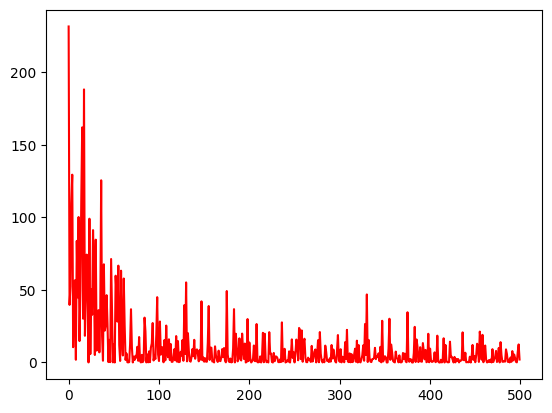

In [149]:
x_axis = list(range(500))
plt.plot(x_axis, losses[:500], color="r")
plt.show()

In [170]:
def mini_batch_gradient_descent(X_b, y, n_epochs, mini_batch_size=20, 
                                learning_rate=0.01):
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033],
                          [0.29763545]])
    thetas_path = [thetas]
    losses = []
    for epoch in range(n_epochs):
        shuffled_indicies = np.asarray([21, 144, 17, 107, 37, 115, 167, 31, 3, 132, 
                                    179, 155, 36, 191, 182, 170, 27, 35, 162, 25, 
                                    28, 73, 172, 152, 102, 16, 185, 11, 1, 34, 177, 
                                    29, 96, 22, 76, 196, 6, 128, 114, 117, 111, 43, 
                                    57, 126, 165, 78, 151, 104, 110, 53, 181, 113, 
                                    173, 75, 23, 161, 85, 94, 18, 148, 190, 169, 149, 
                                    79, 138, 20, 108, 137, 93, 192, 198, 153, 4, 45, 
                                    164, 26, 8, 131, 77, 80, 130, 127, 125, 61, 10, 175, 
                                    143, 87, 33, 50, 54, 97, 9, 84, 188, 139, 195, 72, 64, 
                                    194, 44, 109, 112, 60, 86, 90, 140, 171, 59, 199, 105, 
                                    41, 147, 92, 52, 124, 71, 197, 163, 98, 189, 103, 51, 39, 
                                    180, 74, 145, 118, 38, 47, 174, 100, 184, 183, 160, 69, 
                                    91, 82, 42, 89, 81, 186, 136, 63, 157, 46, 67, 129, 120, 
                                    116, 32, 19, 187, 70, 141, 146, 15, 58, 119, 12, 95, 0, 40, 
                                    83, 24, 168, 150, 178, 49, 159, 7, 193, 48, 30, 14, 121, 5, 
                                    142, 65, 176, 101, 55, 133, 13, 106, 66, 99, 68, 135, 158, 88, 
                                    62, 166, 156, 2, 134, 56, 123, 122, 154])
        X_b_shuffled = X_b[shuffled_indicies]
        y_shuffled = y[shuffled_indicies]
        for i in range(0, len(y), mini_batch_size):
            xi = X_b_shuffled[i: i+mini_batch_size]
            yi = y_shuffled[i : i + mini_batch_size]

            # Compute predict
            y_hat = xi.dot(thetas)
            # Compute loss
            loss = ((y_hat - yi)**2)/2

            k = (y_hat - yi)/mini_batch_size
            # Compute gradient
            dl_dthetas = xi.T.dot(k)

            # Update thetas
            thetas = thetas - learning_rate * dl_dthetas

            thetas_path.append(thetas)
            loss_mean = np.sum(loss)/mini_batch_size
            losses.append(loss_mean)

    return thetas_path, losses

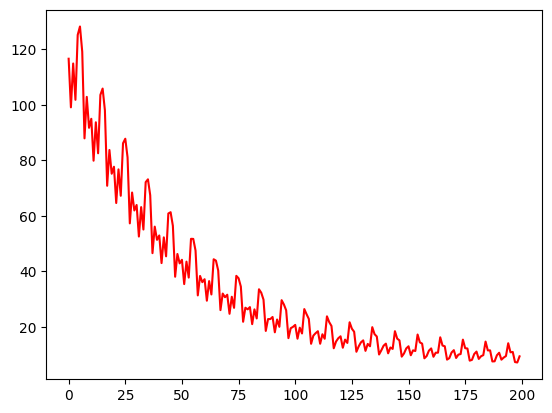

In [171]:
mngd, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, mini_batch_size=20, learning_rate= 0.01)

x_axis = list(range(200))
plt.plot(x_axis, losses[:200], color='r')
plt.show()

In [172]:
round(sum(losses), 2)

np.float64(8865.65)

In [196]:
def batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01):
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033],
                          [0.29763545]])
    losses = []
    thetas_path = [thetas]
    N = len(y)

    for epoch in range(n_epochs):
        y_hat = X_b.dot(thetas)

        loss = (y_hat - y)**2

        k = 2*(y_hat - y)/N

        dl_dthetas = X_b.T.dot(k)
        thetas = thetas - learning_rate * dl_dthetas

        loss_mean = np.sum(loss)/N
        thetas_path.append(thetas)
        losses.append(loss_mean)
    return thetas_path, losses


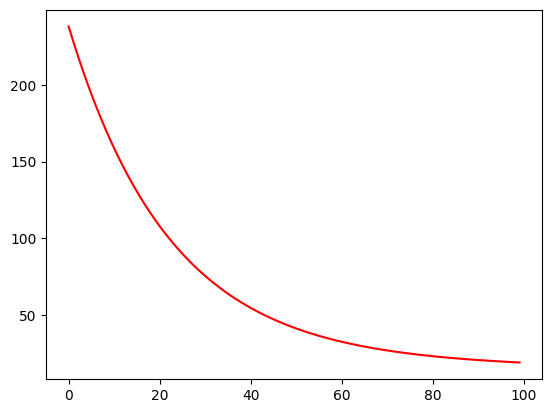

In [197]:
dgb_thetas, losses = batch_gradient_descent(X_b, y)

x_axis = list(range(100))
plt.plot(x_axis, losses[:100], color="r")
plt.show()

In [198]:
round(sum(losses), 2)


np.float64(6716.46)